In [1]:
#importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing data into dataframe and exploring the data for preprocessing

df1=pd.read_csv("fraud.csv")
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df1.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df1.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
#checking for null values to treat

df1.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df1.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


<Axes: xlabel='type', ylabel='count'>

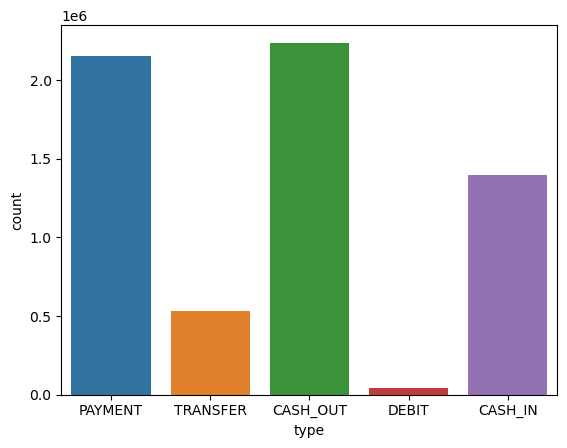

In [8]:
#plotting the data using seaborn for better understanding and analysis via visualization 

sns.countplot(x='type', data=df1)

<Axes: xlabel='type', ylabel='amount'>

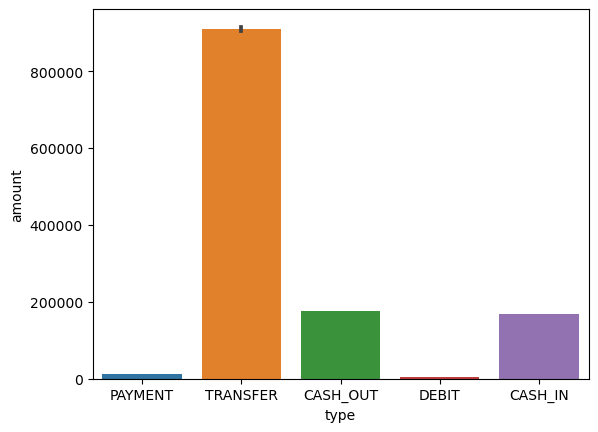

In [9]:
sns.barplot(x='type', y='amount', data=df1)

<Axes: xlabel='type', ylabel='amount'>

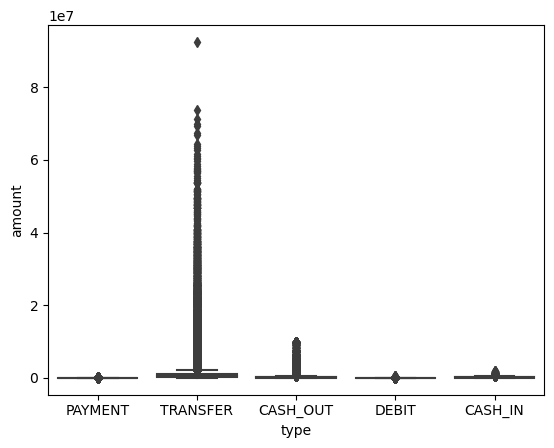

In [10]:
#checking for outliers via boxplot

sns.boxplot(x='type',y='amount',data=df1)

In [11]:
#exploring data continues

df1['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [12]:
df1['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [13]:
#outlier detection and treatment using IQR(inter quartile range) method

IQR=2.087215e+05-1.338957e+04
print(IQR)
lower_limit = 1.338957e+04 - 1.5*IQR
upper_limit = 2.087215e+05 + 1.5*IQR
print(upper_limit)
print(lower_limit)

195331.93
501719.395
-279608.325


In [14]:
df1[df1.amount>upper_limit].count()

step              338077
type              338077
amount            338077
nameOrig          338077
oldbalanceOrg     338077
newbalanceOrig    338077
nameDest          338077
oldbalanceDest    338077
newbalanceDest    338077
isFraud           338077
isFlaggedFraud    338077
dtype: int64

In [15]:
df1[df1.amount<lower_limit].count()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [16]:
df2 = df1[(df1['amount']>lower_limit) & (df1['amount']<upper_limit)]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6024543 entries, 0 to 6362615
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 551.6+ MB


<Figure size 1500x600 with 0 Axes>

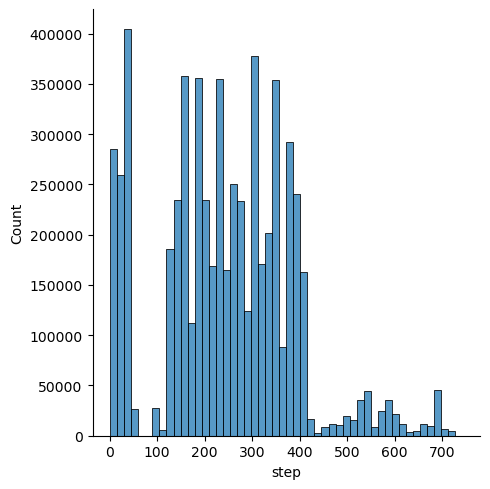

In [17]:
#exploring the new and cleaned data

plt.figure(figsize=(15, 6))
sns.displot(df2['step'], bins=50)

<Axes: ylabel='amount'>

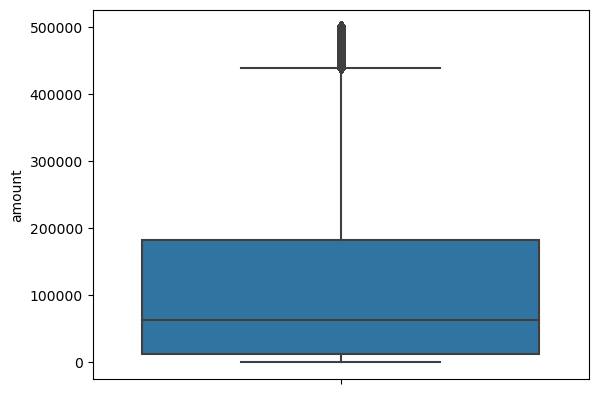

In [18]:
sns.boxplot(y='amount',data=df2)

<Axes: xlabel='amount', ylabel='Count'>

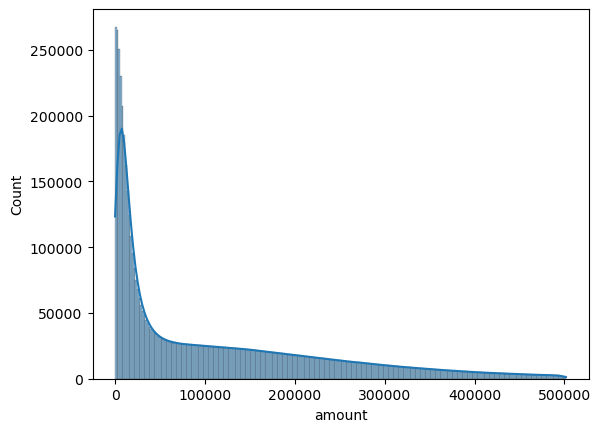

In [19]:
#checking the type of distrubituon for the data.

sns.histplot(data = df2, x = "amount", kde = True)

C:\Users\shubh\AppData\Local\Temp\ipykernel_16192\2714487887.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(),


<Axes: >

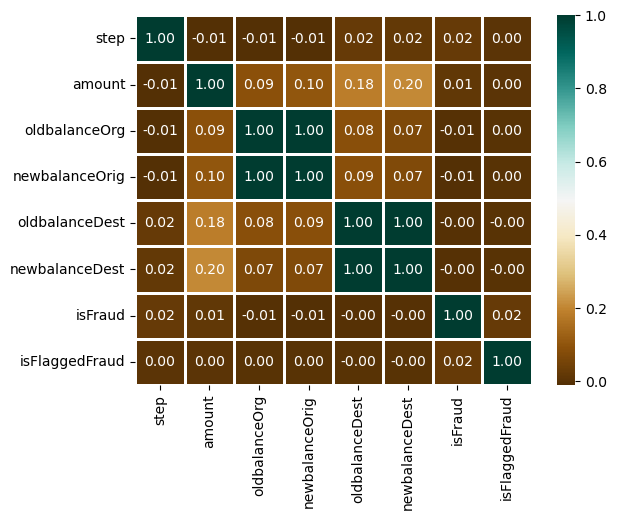

In [20]:
#checking for multi-collinearity 

sns.heatmap(df2.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

In [21]:
df2.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.024543e+06,6.024543e+06,6.024543e+06,6.024543e+06,6.024543e+06,6.024543e+06,6.024543e+06,6.024543e+06
mean,2.433126e+02,1.115342e+05,8.619578e+05,8.859128e+05,9.871264e+05,1.037883e+06,7.235404e-04,3.319754e-07
std,1.422881e+02,1.203984e+05,2.933836e+06,2.969976e+06,3.031559e+06,3.055336e+06,2.688897e-02,5.761730e-04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.236855e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.380000e+02,6.317584e+04,1.514600e+04,0.000000e+00,1.027301e+05,1.683203e+05,0.000000e+00,0.000000e+00
75%,3.340000e+02,1.829338e+05,1.134380e+05,1.602874e+05,8.249873e+05,9.251457e+05,0.000000e+00,0.000000e+00
max,7.430000e+02,5.017194e+05,4.381886e+07,4.368662e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [22]:
#one-hot encoding for type column 

typedum=pd.get_dummies(df2.type)
typedum

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
6362609,0,1,0,0,0
6362610,0,0,0,0,1
6362611,0,1,0,0,0
6362614,0,0,0,0,1


In [23]:
df3=pd.concat([df2, typedum], axis=1)
df3.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,0,1,0


In [24]:
#creation of intput and output dataframes

X = df3.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = df3['isFraud']
X.shape

(6024543, 12)

In [25]:
y.shape

(6024543,)

In [26]:
#splitting the dataframes into multiple dataframes for training the model and testing the model.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [27]:
#Normalizing the data for model training.

from sklearn.preprocessing import MinMaxScaler  
scm= MinMaxScaler()  
X_train_stm= scm.fit_transform(X_train)    
X_test_stm= scm.transform(X_test) 

In [28]:
#importing machine learning models to train the data with.

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import roc_auc_score as ras

In [29]:
models = [LogisticRegression(), XGBClassifier(),
          DecisionTreeClassifier(criterion='entropy', random_state=42),
          RandomForestClassifier(n_estimators=7,criterion='entropy', random_state=42)]
 
for i in range(len(models)):
    models[i].fit(X_train, y_train)
    print(f'{models[i]} : ')
     
    train_preds = models[i].predict_proba(X_train)[:, 1]
    print('Training Accuracy : ', ras(y_train, train_preds))
     
    y_preds = models[i].predict_proba(X_test)[:, 1]
    print('Validation Accuracy : ', ras(y_test, y_preds))
    print()

LogisticRegression() : 
Training Accuracy :  0.9783778564295379
Validation Accuracy :  0.9793795637590766

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.9999407607206895
Validation Accuracy :  0.9997063564681697

DecisionTreeClassifier(criterion='entropy', rando

In [30]:
#Since XGBClassifier is our best performing model, we shall select it as our final training model.
xbg = XGBClassifier()
xbg.fit(X_train_stm,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [31]:
y_pred= xbg.predict(X_test_stm)

Confusion Matrix:
[[1504974      74]
 [    280     808]]


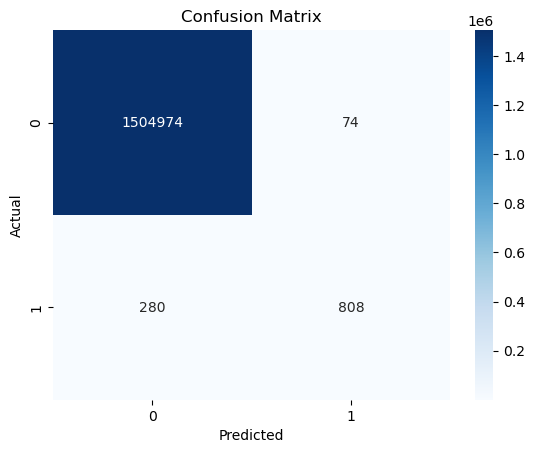

In [33]:
#Deriving and plotting confusion matrix
from sklearn.metrics import confusion_matrix


cm=confusion_matrix(y_test,y_pred,labels=[0,1])
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm,cmap="Blues",annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()